In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz as gv
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import datetime
import sklearn.metrics as skmetrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('./data/loan_prediction_train.csv')

In [3]:
data['Gender'] = data['Gender'].fillna('Unknown')
data['Married'] = data['Married'].fillna('Unknown')
data['Dependents'] = data['Dependents'].fillna(50)
data['Self_Employed']= data['Self_Employed'].fillna('Unknown')
data['LoanAmount']= data['LoanAmount'].fillna('Unknown')#MAYBE CHANGE
data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna('Unknown')#MAYBE CHANGE - change to the mean of the area they are in
data['Credit_History']= data['Credit_History'].fillna('Unknown')

##USE PANDAS.QCUT


In [4]:
#data['Dependents'] = data['Dependents'].fillna(0)

In [5]:
#data[data['Dependents'] == '3+']

In [6]:
data['Dependents'] = data['Dependents'].replace('3+','3').astype(int)

In [7]:
data[data['Dependents'] == '3+']

c:\users\aakash.patel\appdata\local\continuum\miniconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [8]:
data['Dependents'] = data['Dependents'].fillna(0)

data['Dependents'] = data['Dependents'].replace('50','Unknown').astype(str)

In [9]:
#data[data['Self_Employed'] == '']

In [10]:
#data['Self_Employed'].replace('','No')

In [11]:
#data[data['Self_Employed'] == '']

In [12]:
#data['Credit_History'] = data['Credit_History'].fillna(0)

In [13]:
#data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(0)

In [14]:
#data['LoanAmount'] = data['LoanAmount'].fillna(0)

In [15]:
#For Label and one hot encoding

# #Encode the data
# #remove loan ID
# data = data[['Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

# dataEncoded = pd.get_dummies(data,columns = ['Gender'], drop_first=True)

# dataEncoded = pd.get_dummies(dataEncoded,columns = ['Married'], drop_first=True)

# dataEncoded = pd.get_dummies(dataEncoded,columns = ['Education'], drop_first=True)

# dataEncoded = pd.get_dummies(dataEncoded,columns = ['Self_Employed'], drop_first=True)

# #STILL TO DO
# #replace Loan_Amount_term NAN values with median 
# dataEncoded = pd.get_dummies(dataEncoded,columns = ['Loan_Amount_Term'], drop_first=True)

# dataEncoded = pd.get_dummies(dataEncoded,columns = ['Property_Area'], drop_first=True)

# dataEncoded = pd.get_dummies(dataEncoded,columns = ['Loan_Status'], drop_first=True)





In [16]:
#Target Encoding
#Encode the data
#remove loan ID
data = data[['Gender', 'Married', 'Dependents','Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]


dataEncoded = pd.get_dummies(data,columns = ['Loan_Status'], drop_first=True)
#Loan_Status changed to Loan_Status_Y

ListOfCatergoricalValueColumns = ['Gender', 'Married','Education', 'Self_Employed', 'Property_Area', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' ]


In [17]:
###########
#TRY TARGET ENCODING
#Create a lost of the caterforical value columns
for item in ListOfCatergoricalValueColumns:
    dataEncoded[item] = dataEncoded[item].map(dataEncoded.groupby(item)['Loan_Status_Y'].mean())


In [18]:
dataEncoded.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status_Y'],
      dtype='object')

In [19]:
dataEncoded.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.687296,0.687296,0.687296,0.687296,5403.459283,1621.245798,0.687296,0.687296,0.687296,0.687296,0.687296
std,0.013961,0.046829,0.039848,0.007455,6109.041673,2926.248369,0.268437,0.072135,0.251261,0.065663,0.463973
min,0.615385,0.629108,0.611940,0.682927,150.000000,0.000000,0.000000,0.000000,0.078652,0.614525,0.000000
25%,0.693252,0.629108,0.708333,0.686000,2877.500000,0.000000,0.500000,0.701172,0.795789,0.614525,0.000000
50%,0.693252,0.716080,0.708333,0.686000,3812.500000,1188.500000,0.727273,0.701172,0.795789,0.658416,1.000000
75%,0.693252,0.716080,0.708333,0.686000,5795.000000,2297.250000,0.857143,0.701172,0.795789,0.768240,1.000000
max,0.693252,1.000000,0.708333,0.718750,81000.000000,41667.000000,1.000000,1.000000,0.795789,0.768240,1.000000


$Exploratory Testing!!!!!!!$

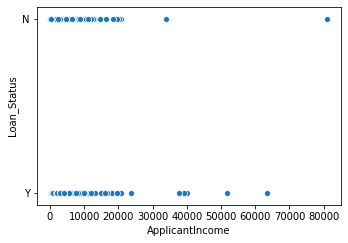

In [20]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.scatterplot(data['ApplicantIncome'], data['Loan_Status'])

In [21]:
numOfTrue = 0
numOfFalse = 0

for value in data['Loan_Status']:
    if value == 'Y':
        numOfTrue +=1
    else:
        numOfFalse +=1
print("The number of people who got accepted for a loan :", numOfTrue)
print("The number of people who got accepted for a loan :", numOfFalse)

The number of people who got accepted for a loan : 422
The number of people who got accepted for a loan : 192


In [22]:
# Did_They_Get_A_Loan = {}
# for c in dataEncoded.columns[0:-1]:
#     #c is key - column names
#     #data.groupby(c)['Loan_Status'].sum() is value
#     Did_They_Get_A_Loan[c] = dataEncoded.groupby(c)['Loan_Status_Y'].sum()

In [23]:
# i = 1
# plt.figure(figsize=(24, 15))
# for c, p in Did_They_Get_A_Loan.items():
#     #10 rows of plots, 2 columns
#     plt.subplot(10, 2, i)
#     i += 1
#     plt.bar(p.index, p.values)
#     plt.title('Did They Get The Loan Against {}'.format(c))

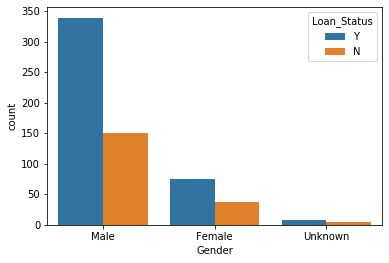

In [24]:
#Amazing!!!!!
sns.countplot('Gender', hue='Loan_Status', data=data)

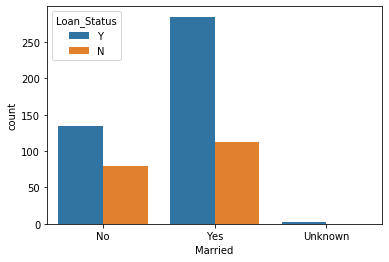

In [25]:
sns.countplot('Married', hue='Loan_Status', data=data)

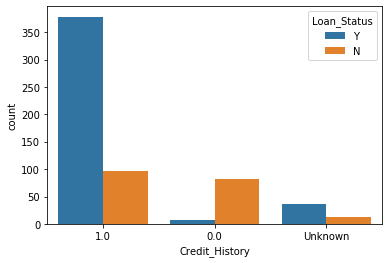

In [26]:
sns.countplot('Credit_History', hue='Loan_Status', data=data)

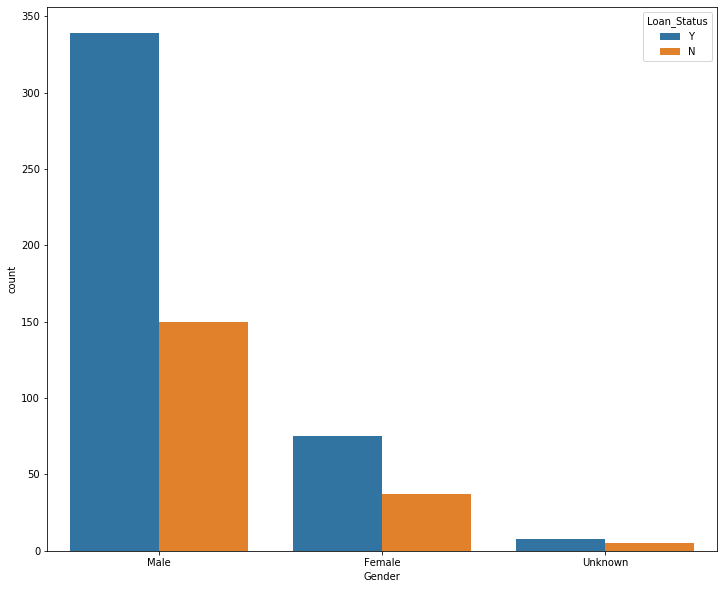

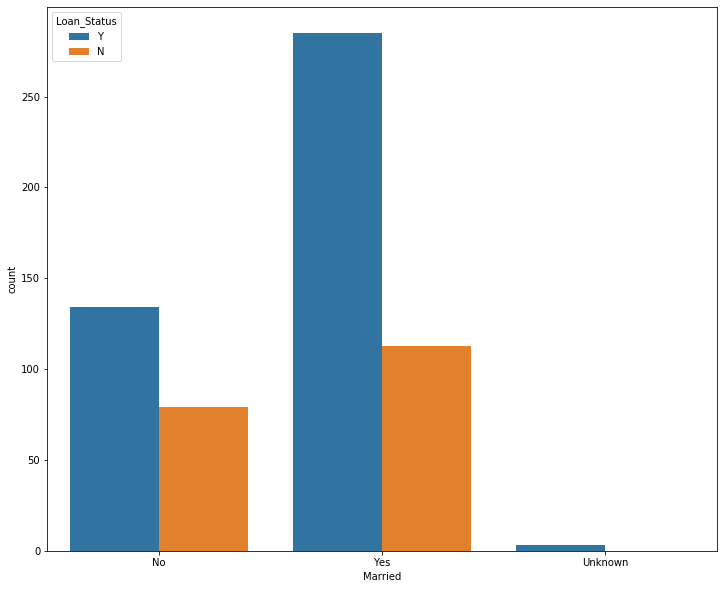

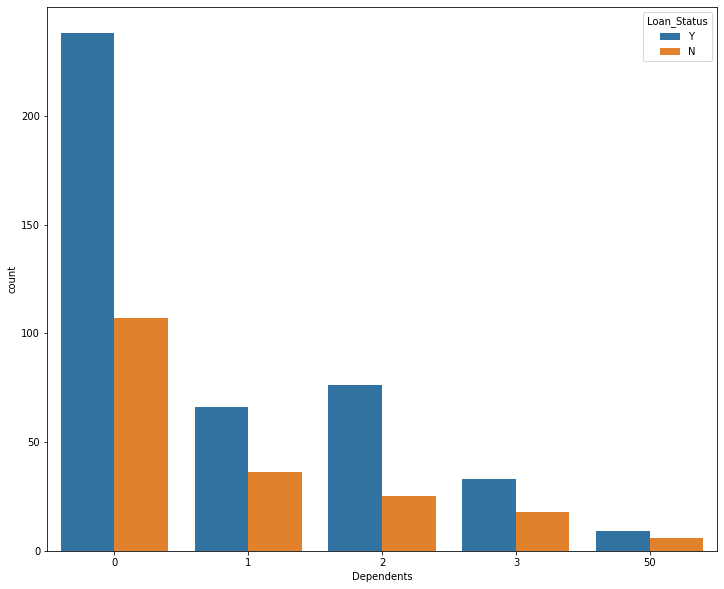

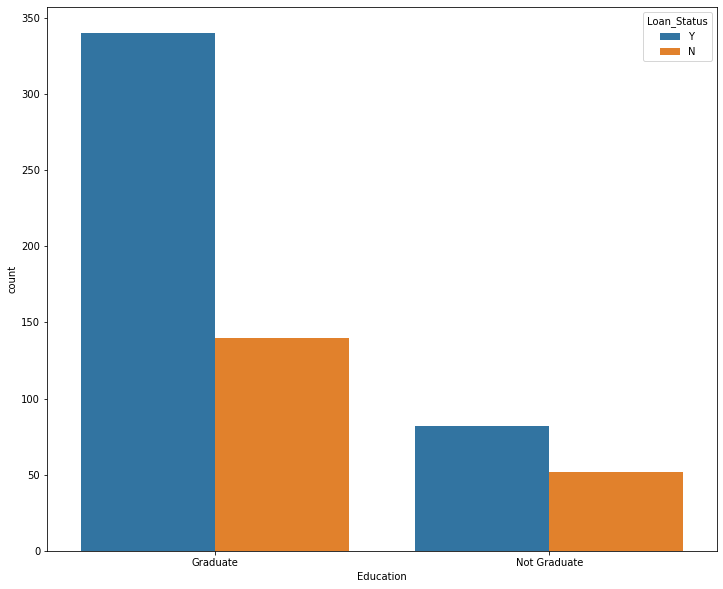

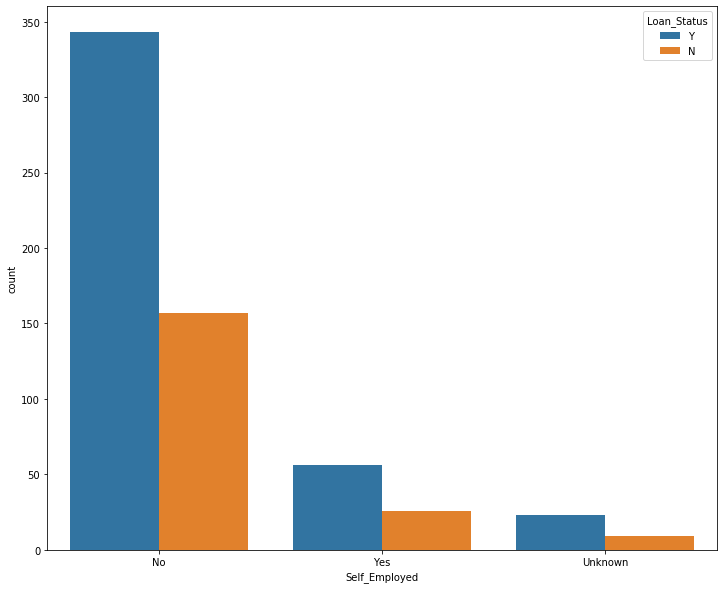

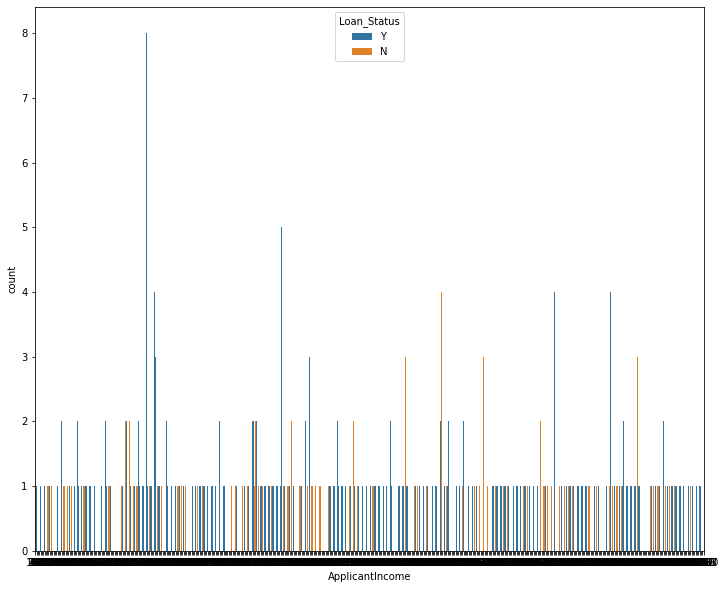

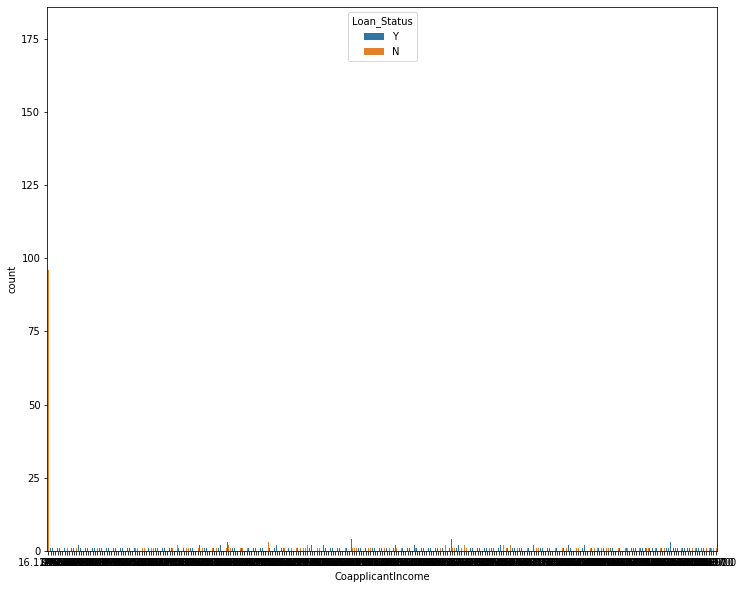

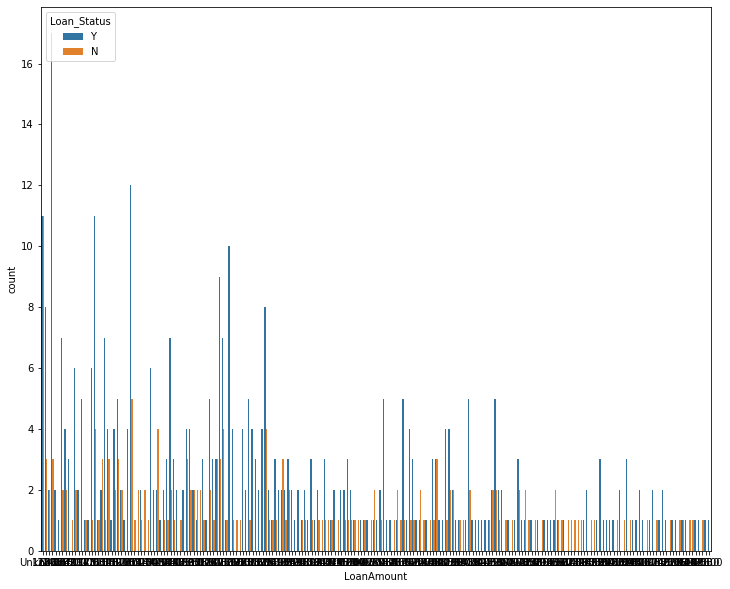

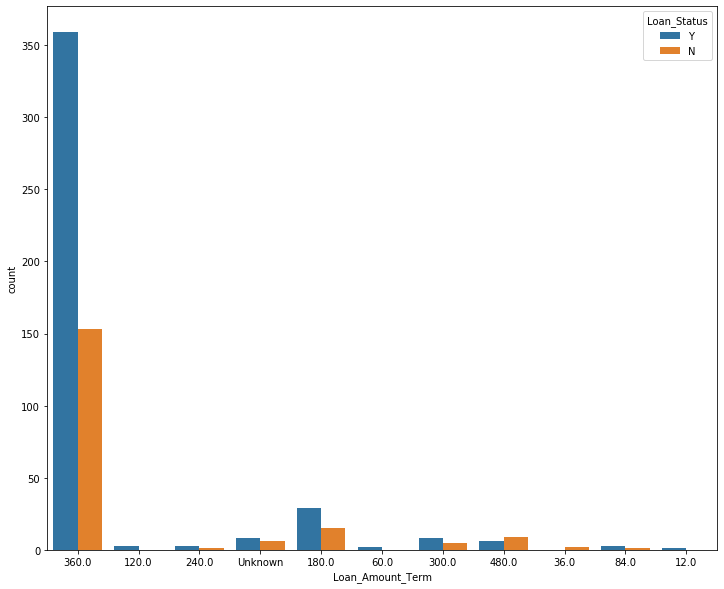

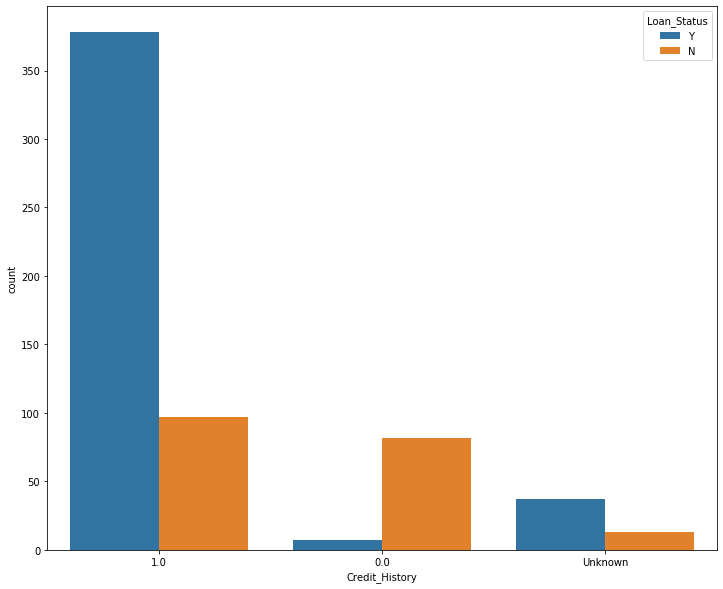

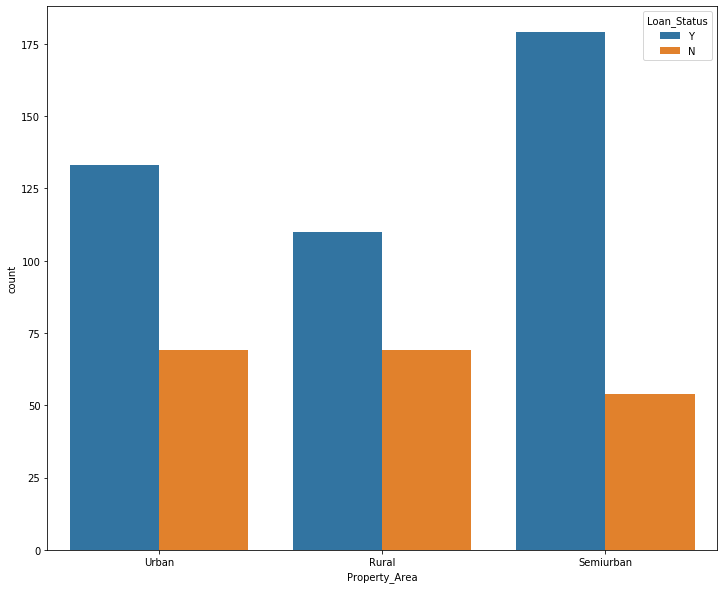

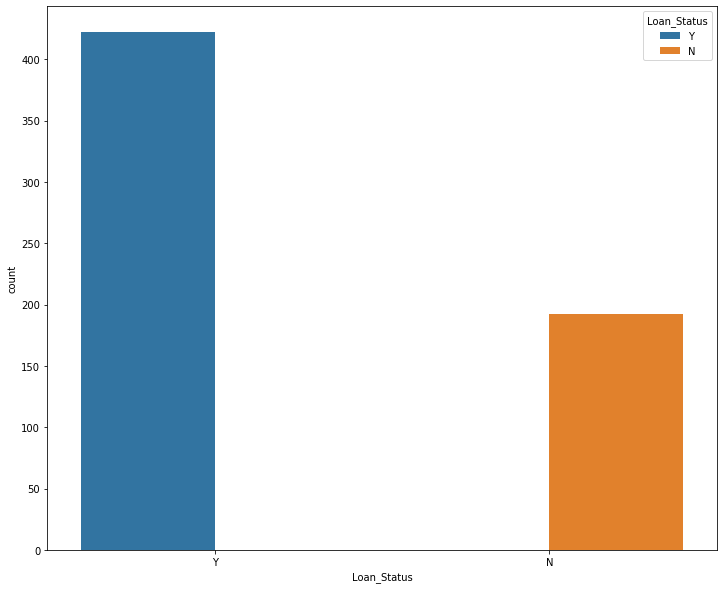

In [27]:
for column in data:
    plt.figure(figsize=(12, 10))
    sns.countplot(column, hue='Loan_Status', data=data)

In [28]:
dataEncoded.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status_Y'],
      dtype='object')

In [29]:
x=dataEncoded[['Gender', 'Married', 'Dependents','Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

y=dataEncoded['Loan_Status_Y']

In [30]:
dataEncoded.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.687296,0.687296,0.687296,0.687296,5403.459283,1621.245798,0.687296,0.687296,0.687296,0.687296,0.687296
std,0.013961,0.046829,0.039848,0.007455,6109.041673,2926.248369,0.268437,0.072135,0.251261,0.065663,0.463973
min,0.615385,0.629108,0.611940,0.682927,150.000000,0.000000,0.000000,0.000000,0.078652,0.614525,0.000000
25%,0.693252,0.629108,0.708333,0.686000,2877.500000,0.000000,0.500000,0.701172,0.795789,0.614525,0.000000
50%,0.693252,0.716080,0.708333,0.686000,3812.500000,1188.500000,0.727273,0.701172,0.795789,0.658416,1.000000
75%,0.693252,0.716080,0.708333,0.686000,5795.000000,2297.250000,0.857143,0.701172,0.795789,0.768240,1.000000
max,0.693252,1.000000,0.708333,0.718750,81000.000000,41667.000000,1.000000,1.000000,0.795789,0.768240,1.000000


In [31]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
dtr5 = DecisionTreeClassifier(max_depth=5)
dtr10 = DecisionTreeClassifier(max_depth=10)
dtr15=DecisionTreeClassifier(max_depth=15)
rfr5 = RandomForestClassifier(max_depth=5, n_jobs = -1, n_estimators=2000)
rfr10 = RandomForestClassifier(max_depth=10, n_jobs = -1, n_estimators=2000)
rfr15 = RandomForestClassifier(max_depth=15, n_jobs = -1, n_estimators=2000)
rfr20 = RandomForestClassifier(max_depth=20, n_jobs = -1, n_estimators=2000)
rfr100 = RandomForestClassifier(max_depth=100, n_jobs = -1, n_estimators=2000)
gb5 = GradientBoostingClassifier(max_depth=5, n_estimators=2000)
gb10 = GradientBoostingClassifier(max_depth=10, n_estimators=2000)
gb15 = GradientBoostingClassifier(max_depth=15, n_estimators=2000)

In [32]:
regressor_dictionary = {'Logistic Regression':lr,
                        'Decision Tree depth 5':dtr5,
                       'Decision Tree depth 10': dtr10,
                       'Decision Tree depth 15': dtr15,
                        'Random Forest depth 5':rfr5,
                        'Random Forest depth 10':rfr10,
                        'Random Forest depth 15':rfr15,
                        'Random Forest depth 20':rfr20,
                        'Random Forest depth 100':rfr100,
                        "Gradient Boosting depth 5": gb5,
                        "Gradient Boosting depth 10":gb10,
                        "Gradient Boosting depth 15":gb15,}

kf = KFold(n_splits = 6, shuffle=True)

listOfAccuracyScore = []
for key, regressor in regressor_dictionary.items():
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    for train_idx, test_idx in kf.split(x, y):
        i=1
        x_train, y_train, x_test, y_test = x.iloc[train_idx], y.iloc[train_idx], \
        x.iloc[test_idx], y.iloc[test_idx]
    
        regressor.fit(x_train, y_train)
        y_predicted = regressor.predict(x_test)
        accuracy = (skmetrics.accuracy_score(y_test, y_predicted) * 100)
        listOfAccuracyScore.append(accuracy)
        #fpr, tpr, thresholds=skmetrics.roc_curve(y_test, y_predicted)
        #fpr, tpr, thresholds=skmetrics.roc_curve(y_test, regressor.predict_proba(x_test))
        
        #plt.figure(figsize=(15,8))
        #plt.subplot(3,3,i)
        #plt.plot(fpr,tpr, c='r', label='roc')
        #plt.show()
        i+=1
#         print(y_test.value_counts())
#         print("===============================================================")
#         print("CONFUSION MATRIX for " + str(regressor) + " ==== \n" + str(skmetrics.confusion_matrix(y_test, y_predicted)))
#         print('Our model has correctly classified {0}% of all observations in the test data' \
#                  .format(skmetrics.accuracy_score(y_test, y_predicted) * 100))
#         print("===============================================================")
    average_accuracy_score = (sum(listOfAccuracyScore) / len(listOfAccuracyScore))
    plt.show()
    print("For " + key + " the average score is " + str(average_accuracy_score))
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For Logistic Regression the average score is 85.9873722951964
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For Decision Tree depth 5 the average score is 83.9575797956723
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For Decision Tree depth 10 the average score is 83.11705480466189
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For Decision Tree depth 15 the average score is 82.41163779427629
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For Random Forest depth 5 the average sc